In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import random as rnd

In [2]:
train = pd.DataFrame(pd.read_csv('Trainfile.csv'))
test = pd.DataFrame(pd.read_csv('Testfile.csv'))

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1138 entries, 0 to 1137
Data columns (total 81 columns):
Idx              1138 non-null int64
MSSubClass       1138 non-null int64
MSZoning         1138 non-null object
LotFrontage      938 non-null float64
LotArea          1138 non-null int64
Street           1138 non-null object
Alley            66 non-null object
LotShape         1138 non-null object
LandContour      1138 non-null object
Utilities        1138 non-null object
LotConfig        1138 non-null object
LandSlope        1138 non-null object
Neighborhood     1138 non-null object
Condition1       1138 non-null object
Condition2       1138 non-null object
BldgType         1138 non-null object
HouseStyle       1138 non-null object
OverallQual      1138 non-null int64
OverallCond      1138 non-null int64
YearBuilt        1138 non-null int64
YearRemodAdd     1138 non-null int64
RoofStyle        1138 non-null object
RoofMatl         1138 non-null object
Exterior1st      1138 non-nu

In [4]:
train.head()

,Idx,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,45,RL,59.0,7227,Pave,NaN,Reg,HLS,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,105500
1,2,60,RL,NaN,12227,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,272000
2,3,20,RL,65.0,7800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2009,WD,Normal,130000
3,4,60,RL,88.0,12665,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,281213
4,5,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000


In [5]:
train = train.drop("Idx" , axis=1)
test = test.drop("Idx" , axis=1)

In [6]:
for i in range(len(train.columns)):
    if train[train.columns[i]].dtypes == object:
        train.iloc[:,i] , uniques = pd.factorize(train.iloc[:,i])
        test.iloc[:,i], uniques = pd.factorize(test.iloc[:,i]) 

In [7]:
for i in range(len(train.columns)):
    mean_train = (train.iloc[:,i].mean())
    mean_test = (test.iloc[:,i].mean())
    train.iloc[:, i] = train.iloc[:, i].fillna(mean_train)
    test.iloc[:, i] = test.iloc[:, i].fillna(mean_test)

In [8]:
#for i in range(len(train.columns)-1):
#        sns.swarmplot(x=train.iloc[:, i],y=train.iloc[:,-1])
#        plt.show()

In [9]:
#Utilities has all entries same for every row

train = train.drop("Utilities" , axis =1)
test = test.drop("Utilities" , axis =1)

In [10]:
corr_matrix = train.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice      1.000000
OverallQual    0.791583
GrLivArea      0.696450
GarageCars     0.643390
GarageArea     0.622827
                 ...   
HouseStyle    -0.202957
PavedDrive    -0.215778
Electrical    -0.233148
CentralAir    -0.261136
MSZoning      -0.295984
Name: SalePrice, Length: 79, dtype: float64

In [11]:
corr_matrix

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
MSSubClass,1.000000,0.314206,-0.331826,-0.209666,-0.011908,0.127766,-0.135070,-0.002824,0.039535,0.000417,...,-0.000068,-0.007786,-0.093107,-0.041278,-0.020913,-0.005126,-0.008409,-0.002925,0.003002,-0.089530
MSZoning,0.314206,1.000000,-0.288349,-0.219928,0.094954,0.266649,-0.186987,0.043107,-0.025494,-0.036851,...,-0.031279,-0.029029,-0.008305,-0.020654,-0.015487,0.031303,-0.025008,-0.013235,0.085677,-0.295984
LotFrontage,-0.331826,-0.288349,1.000000,0.355560,0.043708,-0.136352,0.182629,0.002212,-0.171581,-0.059719,...,0.238904,0.197351,0.030643,0.013952,0.003039,0.020311,0.007713,0.110954,0.011627,0.352169
LotArea,-0.209666,-0.219928,0.355560,1.000000,0.052858,-0.069359,0.334005,0.252966,0.079364,0.078035,...,0.111361,0.082586,-0.035979,0.081197,0.023828,-0.005572,-0.043966,0.020224,-0.020736,0.284774
Street,-0.011908,0.094954,0.043708,0.052858,1.000000,-0.015590,0.018712,0.117953,-0.016271,-0.168583,...,-0.004389,-0.004074,-0.028311,0.109515,0.011053,-0.012989,0.027696,0.039747,0.042888,-0.059738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,-0.005126,0.031303,0.020311,-0.005572,-0.012989,-0.010350,0.033974,-0.016604,0.005875,-0.012114,...,-0.061022,-0.065059,0.020104,0.001067,-0.021213,1.000000,-0.161700,0.093475,0.020520,0.095011
YrSold,-0.008409,-0.025008,0.007713,-0.043966,0.027696,-0.037291,-0.007294,-0.016602,-0.002578,0.006499,...,-0.044076,-0.054583,0.000891,0.057821,0.013609,-0.161700,1.000000,-0.094049,-0.069943,-0.022898
SaleType,-0.002925,-0.013235,0.110954,0.020224,0.039747,-0.029958,0.010087,-0.047052,-0.025227,0.037062,...,0.009520,-0.001970,-0.098810,-0.011035,-0.021914,0.093475,-0.094049,1.000000,0.276927,0.232649
SaleCondition,0.003002,0.085677,0.011627,-0.020736,0.042888,0.036516,-0.068624,-0.024304,-0.059643,0.008145,...,0.055009,0.055583,0.018618,-0.031661,-0.029829,0.020520,-0.069943,0.276927,1.000000,-0.000207


In [12]:
#Keeping values which are highly correlated with SalePrice
i = []
for j in range(len(train.columns)):
    if corr_matrix.iloc[j,-1] < 0.5:
        i.append(j)
        
train = train.drop(train.columns[i], axis=1)
test = test.drop(test.columns[i], axis = 1)

In [13]:
train.head()

,OverallQual,YearBuilt,YearRemodAdd,ExterQual,BsmtQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,6,1954,1954,0,0,832,832,832,1,4,2,528,105500
1,6,1977,1995,0,1,1330,1542,2872,2,11,2,619,272000
2,5,1967,2004,0,0,864,899,899,1,5,1,288,130000
3,8,2005,2006,1,1,1094,1133,2482,2,9,3,642,281213
4,10,2008,2008,2,2,3094,2402,2402,2,10,3,672,555000


In [14]:
X_train = train.iloc[:,0:len(train.columns)-1]
y_train = np.log(train.iloc[:,-1:])

X_test = test.iloc[:,0:len(test.columns)-1]
y_test = np.log(test.iloc[:,-1:])

theta = np.zeros([len(X_train.columns)+1,1])
for i in range(len(X_train.columns)+1):
    theta[i] = rnd.random()

In [15]:
X_train = (X_train - X_train.mean())/X_train.std()
X_test = (X_test - X_test.mean())/X_test.std()

X_train.insert(0,"ones" , np.ones([X_train.shape[0],1]),True)
X_test.insert(0,"ones" , np.ones([X_test.shape[0],1]),True)

In [16]:
def computeCost(X,y,theta):
    J = np.sum(np.power((np.dot(X , theta) - y),2))/(2 * len(X))
    return J

def gradientDescent(X,y,theta,iters,alpha):
    J = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.dot(X.T , (np.dot(X , theta) - y)) 
        J[i] = computeCost(X, y, theta)
    return theta,J

In [17]:
#using no. of iterations vs J plot , J is almost constant after 300 iterations
iters = 1000
alpha = 0.05

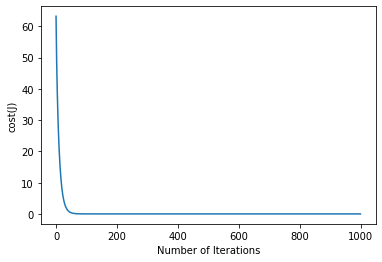

In [18]:
w, J_history= gradientDescent(X_train,y_train,theta,iters,alpha)
ax=sns.lineplot(data=J_history)
ax.set(xlabel='Number of Iterations', ylabel='cost(J)')
plt.show()

In [19]:
h = np.dot(X_train , w)
h = np.exp(h)
y_train = np.exp(y_train)
MAPE = 0
for i in range(h.shape[0]):
    MAPE += abs(h[i] - y_train.iloc[i,:])/y_train.iloc[i,:]
MAPE/=h.shape[0]/100
print('Accuracy of the model on training set is ', float(100-MAPE),'%')

Accuracy of the model on training set is  87.60356852744411 %


In [20]:
h = np.dot(X_test , w)
h = np.exp(h)
y_test = np.exp(y_test)
MAPE = 0
for i in range(h.shape[0]):
    MAPE += abs(h[i] - y_test.iloc[i,:])/y_test.iloc[i,:]
MAPE/=h.shape[0]/100
print('Accuracy of the model on test set is ', float(100-MAPE),'%')

Accuracy of the model on test set is  88.07508178260939 %
